Eliminate False Alarms Using This One Weird Trick (Setting Your Constant False Alarm Rate to Zero)

Engineering should not be a quest for understanding. In my opinion, the quest for understanding draws a line between science and engineering. It’s not a perfectly clean line, because there is no perfect line, but it’s hard to beat. Science seeks understanding. Engineering seeks solutions to problems. While vise versa is often true, it’s true less often. I also don’t deny that one hand often washes the other: solving problems as an engineer will also improve your understanding of things. But solving problems is still not science. An engineer’s ultimate goal is not to understand our world better. Our existence is defined by the problem we are given. Engineers appreciate understanding our world better, but that’s because it sets us up to be better at solving problems in the future.

Whether you’re an engineer, a scientist, or anything else, it is important to be honest in your quest. Whether your goal is understanding, a general feeling of usefulness in your workplace, or to impress your colleagues with your unhealthy work ethic, being honest to yourself about your goal will help you achieve it. For example, my brother in law teaches middle school Spanish. He tells his students that communication doesn’t have to be pretty. In his students’ case, the goal is to create a bridge over a language barrier where there previously was none. That bridge does not need to be beautiful to work. It doesn’t even need to be safe since it’s a metaphorical bridge. Engineering doesn’t have to be pretty either. If you’ve spent a half semester in an undergraduate engineering program, you’ve already accepted this fact, usually because you had no choice. Your life was defined by deadlines. Projects need to be completed before the next one comes. There’s no sense in lying to yourself about what you’re doing: getting to “good enough” so you can move on. 

If you’re like me, one of your many goals on a project will be to detect a signal. Just like in school, you would like to do a good job, but you probably don’t have all day and night to design something perfect. You may be aware that there are entire textbooks on the topic of detection. You may have taken a graduate level course that uses one of these textbooks. Or you may be vaguely aware that these courses exist. Either way, you know that it takes time to open a textbook and familiarize (or re-familiarize) yourself enough with the material to design something that matches the book. Is detector design worth this much effort?
 
The constant false alarm rate (CFAR) detector is something you’d find in a textbook on detection theory. But do you need to read the book in order to implement one? CFAR is a straightforward concept made rigorous for graduate level engineers. My experience is that, apparently you don’t need the textbook to implement one. After about a decade and a half of professional work, I’ve noticed that just about everyone who makes a detector is quick to call it a CFAR. On some level, this has always bothered me. Are my colleagues cynically giving their work the most technical-sounding name even when they don’t design by the book? 

For those who haven’t designed a detector before, the basic idea is that you hook up your antenna, and compare the strength of whatever it receives to a threshold. If the signal strength is above the threshold, you declare that you’ve just detected a signal. If it’s below, you assume you’re just picking up static or noise, or whatever you want to call it. You need a threshold because there is always noise. Your detector’s job is to determine when there’s also a signal mixed in with the noise. Also, for me to imply that a radio frequency system as an antenna and a detector is an extreme simplification that doesn’t even make sense. Between your antenna and your detector will be a device that repeatedly measures the voltage level at your antenna and creates digital data that is read by a digital processing unit. Or maybe you’re processing underwater acoustic sonar data and instead of a microphone you’re using a hydrophone or doing something else that’s even more esoteric. Either way, your detector’s job is basically the same.


In [3]:
#Generate noise samples like a receiver would produce when no signal is present
import numpy as np

def generate_rx_samps(nsamp_obsv, noise_pow_dBm):

    #Convert noise_pow_dBm to linear
    noise_pow_mW = 10**(0.1*noise_pow_dBm)

    #Create samples of noise
    rx_samps_re = np.random.normal(0, 1, size = int(nsamp_obsv)) #Real
    rx_samps_im = np.random.normal(0, 1, size = int(nsamp_obsv)) #Imaginary

    #Define the power of what you've received
    rx_pow = rx_samps_re**2 + rx_samps_im**2

    #Normalize
    rx_pow = np.sqrt(noise_pow_mW) * rx_pow/np.std(rx_pow)

    return(rx_pow)

Detectors are important because they often are the first step of several in complex systems. In communications and radar, once the detector declares that a signal is present, sophisticated algorithms will begin working to extract information from the signal. The detector can fail in two ways. 1) by declaring that a signal is present even though there is only noise. In this case your sophisticated algorithms will try to extract information from pure noise (resulting in gobbledygook). Think of a smoke alarm beeping when there’s no smoke. 2) by wrongly declaring that a signal is absent. In this case your sophisticated algorithms will not run, and you will miss out on useful information. In the case of a smoke detector, this is pretty bad. 

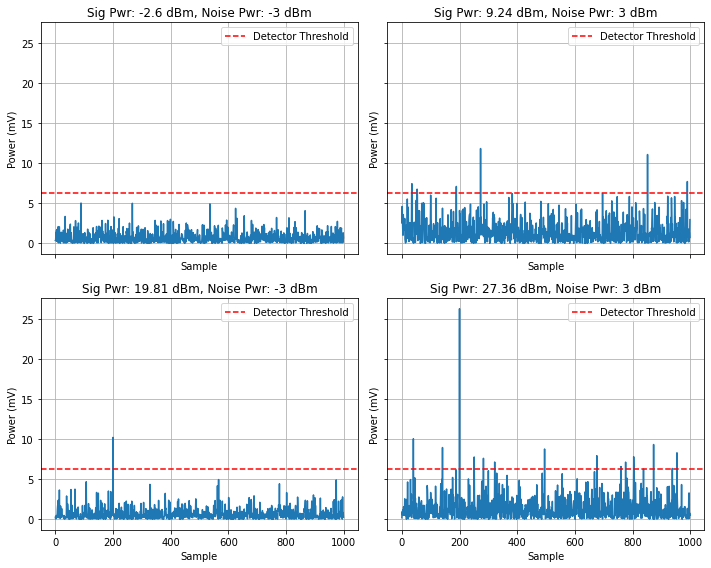

In [22]:
#Show signal plus noise for a few cases, with a constant detector threshold

import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,8))

#Rayleigh scale parameters in mV
signal_scale_mv = [8, 18]

noise_powers_dbm = [-3, 3]

#Nubmer of noise samples
num_samps = 1e3

#Create a fixed threshold level
thresh_level_dbm = 8

#Step through signal and noise powers
for ss in np.arange(0, len(signal_scale_mv)):

    
    for nn in np.arange(0, len(noise_powers_dbm)):

        #Generate noise
        noise_here = generate_rx_samps(num_samps, noise_powers_dbm[nn])

        #Create a signal, which is a kroneker delta function the the specified power
        #Assuming a 1 ohm receiver impedance, this is specified in mW
        signal_here = np.zeros(int(num_samps))
        signal_here[int(num_samps/5)] = np.random.rayleigh(signal_scale_mv[ss], size = 1)

        #Add signal plus noise
        sig_plus_noise = signal_here + noise_here

        #Plot
        axs[ss, nn].plot(sig_plus_noise)
        axs[ss, nn].set_title('Sig Pwr: {} dBm, Noise Pwr: {} dBm'.format(
            np.round(20*np.log10(signal_here[int(num_samps/5)]),2), np.round(noise_powers_dbm[nn],2)))
        axs[ss, nn].set_ylabel('Power (mV)')
        axs[ss, nn].set_xlabel('Sample')
        axs[ss, nn].grid(True)
        if ss == 0 and nn == 0:
            axs[ss, nn].axhline(y=10**(0.1*thresh_level_dbm), color='red', linestyle='--', label="Detector Threshold")
            axs[ss, nn].legend()

plt.tight_layout()
plt.show()




